# **Project 4 Report**

Vincent Ha

CS458

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from sklearn import datasets
import pydotplus
from IPython.display import Image
import pydotplus
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from sklearn.datasets import make_swiss_roll 
from sklearn.neighbors import kneighbors_graph 
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import v_measure_score

## **P4-1. Hierarchical Clustering Dendrogram**

**(a) Randomly generate the following data points: 
<br>     import numpy as np 
<br>        np.random.seed(0) 
<br>        X1 = np.random.randn(50,2)+[2,2] 
<br>        X2 = np.random.randn(50,2)+[6,10] 
<br>        X3 = np.random.randn(50,2)+[10,2] 
<br>        X = np.concatenate((X1,X2,X3))**

In [28]:
# Codes for P4-1(a)
np.random.seed(0) 
X1 = np.random.randn(50,2)+[2,2] 
X2 = np.random.randn(50,2)+[6,10] 
X3 = np.random.randn(50,2)+[10,2] 
X = np.concatenate((X1,X2,X3))

(b) Use **sklearn.cluster.AgglomerativeClustering** to cluster the points generated in (a). Plot 
your Dendrogram using different **linkage {“ward”, “complete”, “average”, “single”}.**
 
**Instructions:** Set **distance_threshold=0, n_clusters=None** in AgglomerativeClustering. The 
default metric used to compute the linkage is ‘euclidean’, so you do not need to change this 
parameter. 

In [29]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Text(0.5, 1.0, 'single')

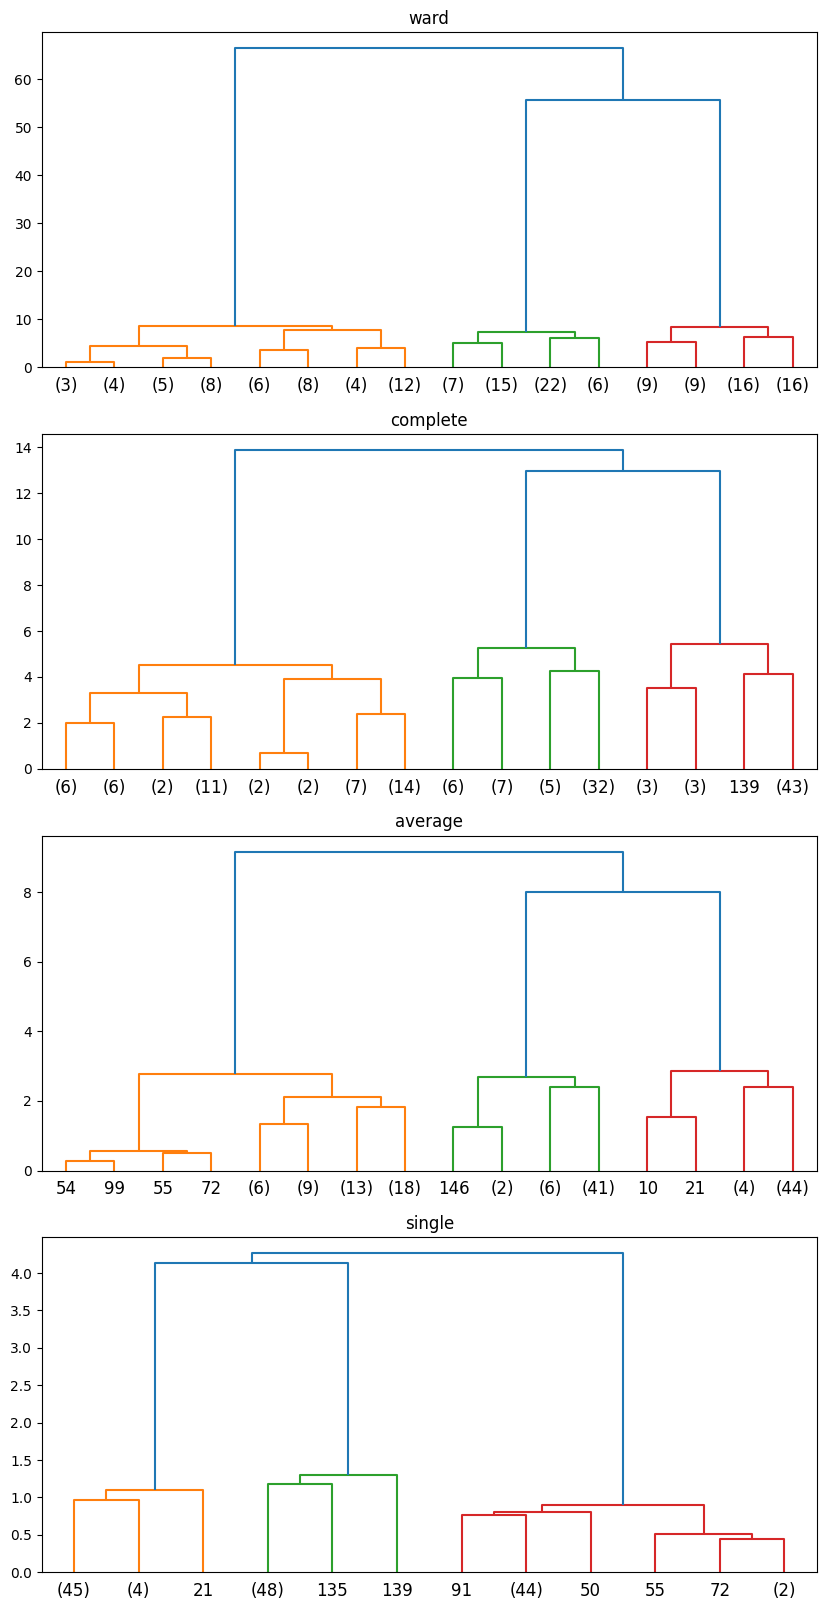

In [48]:
# Codes for P4-1(b)
fig, axs = plt.subplots(4, figsize=(10,20))

cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="ward").fit(X)
plot_dendrogram(cluster, truncate_mode="level", p=3, ax=axs[0])
axs[0].set_title("ward")

cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete").fit(X)
plot_dendrogram(cluster, truncate_mode="level", p=3, ax=axs[1])
axs[1].set_title("complete")

cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="average").fit(X)
plot_dendrogram(cluster, truncate_mode="level", p=3, ax=axs[2])
axs[2].set_title("average")

cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single").fit(X)
plot_dendrogram(cluster, truncate_mode="level", p=3, ax=axs[3])
axs[3].set_title("single")

# **P4-2. Clustering structured dataset**

**(a) Generate a swiss roll dataset: 
<br>  from sklearn.datasets import make_swiss_roll 
<br>  # Generate data (swiss roll dataset) 
<br>  n_samples = 1500 
<br>  noise = 0.05 
<br>  X, _ = make_swiss_roll(n_samples, noise=noise) 
<br>  # Make it thinner 
<br>  X[:, 1] \*= .5**

In [68]:
# Codes for P4-2(a)
# Generate data (swiss roll dataset) 
n_samples = 1500 
noise = 0.05 
X, _ = make_swiss_roll(n_samples, noise=noise) 
# Make it thinner 
X[:, 1] *= .5 

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a), where 
you set the parameters as n_clusters=6, connectivity=connectivity, linkage='ward', where  
<br> from sklearn.neighbors import kneighbors_graph 
<br> connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)**

Plot the clustered data in a 3D figure and use different colors for different clusters in your figure.

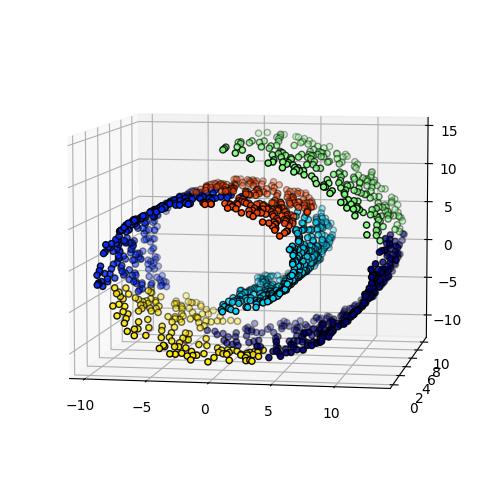

In [8]:
# Codes for P4-2(b)
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False) 
cluster = AgglomerativeClustering(connectivity=connectivity, n_clusters=6, linkage = "ward").fit(X)

label = cluster.labels_

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )

(c) Use **sklearn.cluster.DBSCAN** to cluster the points generated in (a). Plot the clustered data in 
a 3D figure and use different colors different clusters in your figure. Discuss and compare the 
results of DBSCAN with the results in (b). 

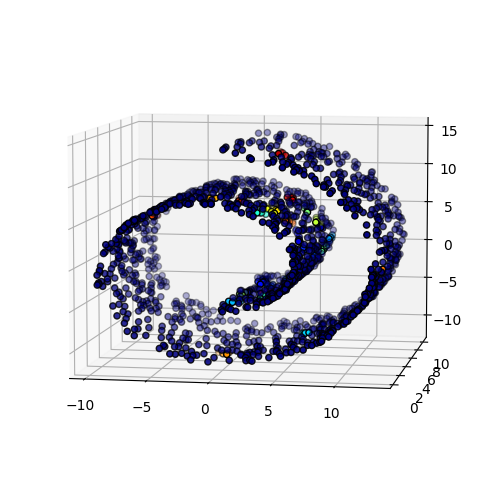

In [11]:
cluster = DBSCAN().fit(X)

label = cluster.labels_

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for l in np.unique(label):
    ax1.scatter(
        X[label == l, 0],
        X[label == l, 1],
        X[label == l, 2],
        color=plt.cm.jet(float(l) / np.max(label + 1)),
        s=20,
        edgecolor="k",
    )

Based on the results of these cluster algorithms and results, k-neightbor is much more effective in clustering in the case of the swiss dataset. The DBSCAN cluster is only going for the closely knitted points which leads to random areas being designated as a cluster in terms of x.

# **P4-3. Clustering the handwritten digits data**

In [72]:
data, labels = datasets.load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

pca = PCA()
reducedData = pca.fit_transform(data)

**(a) Use the following methods to cluster the data: 
<br> K-Means (sklearn.cluster.KMeans) 
<br> DBSCAN (sklearn.cluster.DBSCAN) 
<br>Optimize the parameters of these methods.**

In [95]:
# Codes for P4-3(a)
kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4).fit(reducedData)

DBscan = DBSCAN().fit(reducedData)

**(b) Evaluate these methods based on the labels of the data and discuss which method gives you the best results in terms of accuracy.**

In [96]:
# Codes for P4-3(b)
kmeanPred = kmeans.labels_
print("KMeans homogeneity - ", homogeneity_score(kmeanPred, labels))
print("KMeans completeness - ", completeness_score(kmeanPred, labels))
print("KMeans v_measure - ", v_measure_score(kmeanPred, labels))


DBscanPred = DBscan.labels_
print("DBSCAN homogeneity - ", homogeneity_score(DBscanPred, labels))
print("DBSCAN completeness - ", completeness_score(DBscanPred, labels))
print("DBSCAN v_measure - ", v_measure_score(DBscanPred, labels))

KMeans homogeneity -  0.74339671889979
KMeans completeness -  0.7353879680410089
KMeans v_measure -  0.7393706567127246
DBSCAN homogeneity -  1.0
DBSCAN completeness -  0.0
DBSCAN v_measure -  0.0


There is an error with the DBSCAN in which the points are being designated as -1, which the algorithm deems as too noisy. The KMeans algorithm is better in this case due to elimination as DBSCAN is unable to handle this dataset.